## Implementation of FEM Solution for Poission equation

Choosing $ u = \sin(\pi x)$

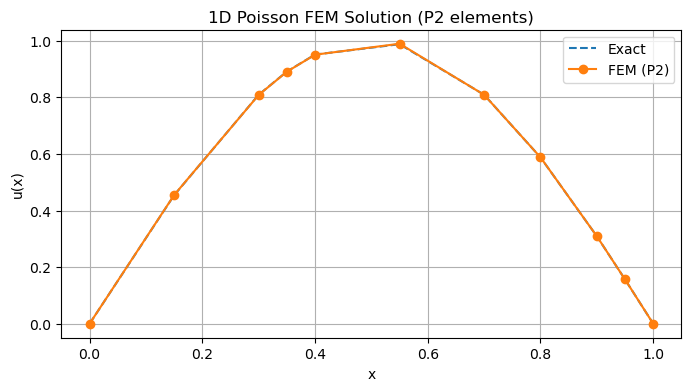

L2 Error: 8.494e-04
H1 Error: 8.648e-02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Poisson import solve_poisson  # Make sure your Poisson solver supports exact_solution input
from scipy.stats import linregress

# Exact solution and source term
pi = np.pi
f = lambda x: pi**2 * np.sin(pi * x)
exact = lambda x: np.sin(pi * x)


# Non-uniform partition
nodes = np.array([0.0, 0.3, 0.4, 0.7, 0.9, 1.0])

# Solve FEM (we'll get x_dofs too)
u_num, err_L2, err_H1 = solve_poisson(nodes, f, exact_solution=exact)

# Build full FEM coordinate list to match u_num (2*n_elements + 1)
x_fem = [nodes[0]]
for k in range(len(nodes) - 1):
    xL = nodes[k]
    xR = nodes[k + 1]
    mid = 0.5 * (xL + xR)
    x_fem.extend([mid, xR])
x_fem = np.array(x_fem)

# Evaluate exact solution at FEM nodes
u_exact = exact(x_fem)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x_fem, u_exact, label="Exact", linestyle="--")
plt.plot(x_fem, u_num, label="FEM (P2)", marker="o")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("1D Poisson FEM Solution (P2 elements)")
plt.legend()
plt.grid(True)
plt.show()

# Print errors
print(f"L2 Error: {err_L2:.3e}")
print(f"H1 Error: {err_H1:.3e}")


### Convergence plot

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
C:\Users\matsk\AppData\Local\Temp\ipykernel_11172\2839882514.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.title("L2 Convergence for $u(x) = \sin(\pi x)$ using P2 FEM")


h = 0.03125, L2 error = 9.268e-08
h = 0.01562, L2 error = 5.791e-09
h = 0.00781, L2 error = 3.622e-10
h = 0.00391, L2 error = 2.367e-11
h = 0.00195, L2 error = 8.483e-12


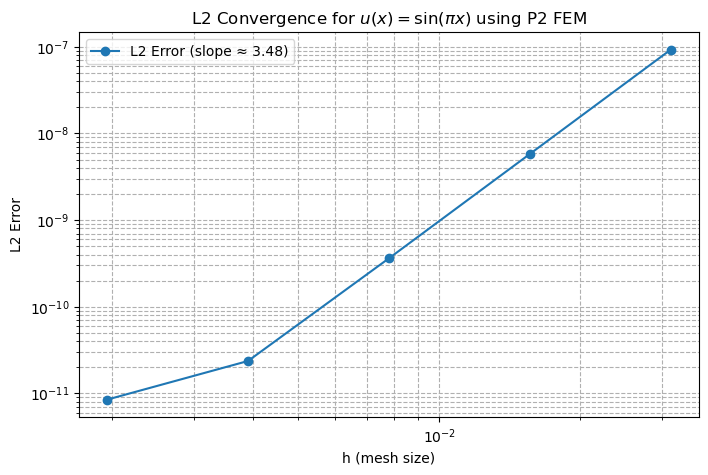

In [14]:

# Convergence test setup
hs = []
errors_L2 = []

# Loop over mesh refinements
for num_elements in [32, 64, 128, 256, 512]:
    nodes = np.linspace(0, 1, num_elements + 1)  # uniform partition
    u_num, err_L2, _, = solve_poisson(nodes, f, exact_solution=exact)
    h = 1.0 / num_elements
    hs.append(h)
    errors_L2.append(err_L2)
    print(f"h = {h:.5f}, L2 error = {err_L2:.3e}")

# Log-log plot
log_h = np.log(hs)
log_err = np.log(errors_L2)
slope, intercept, _, _, _ = linregress(log_h, log_err)

plt.figure(figsize=(8, 5))
plt.plot(hs, errors_L2, 'o-', label=f"L2 Error (slope ≈ {slope:.2f})")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("h (mesh size)")
plt.ylabel("L2 Error")
plt.title("L2 Convergence for $u(x) = \sin(\pi x)$ using P2 FEM")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()